In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates[1:10])

[(55.45287198859535, -179.5862021213234), (44.178165525471655, -123.31842271046372), (18.770594115369207, 40.746856977965734), (-58.68540622668068, 118.66750230109574), (-44.105118204040345, -82.3051303872993), (3.358394303508078, -65.44015114690097), (-67.59267070117812, -99.08117831097229), (-38.062218328119876, 162.8346573059784), (-69.48435738785903, -54.43913753006075)]


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

638

In [6]:
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | katsuura
Processing Record 2 of Set 1 | egvekinot
Processing Record 3 of Set 1 | eugene
Processing Record 4 of Set 1 | abha
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | inirida
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | te anau
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | kununurra
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | dumbea
Processing Record 20 of Set 1 | upata
Processing Record 21 of Set 1 | roros
Processing Record 22 of Set 1 | qaanaaq
Processing Record 23 of S

Processing Record 38 of Set 4 | karagaylinskiy
Processing Record 39 of Set 4 | aanekoski
Processing Record 40 of Set 4 | madera
Processing Record 41 of Set 4 | gengenbach
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | comodoro rivadavia
Processing Record 44 of Set 4 | vestmanna
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | san quintin
Processing Record 47 of Set 4 | nantucket
Processing Record 48 of Set 4 | bethel
Processing Record 49 of Set 4 | morro bay
Processing Record 50 of Set 4 | helong
Processing Record 1 of Set 5 | yellowknife
Processing Record 2 of Set 5 | dutlwe
Processing Record 3 of Set 5 | matagami
Processing Record 4 of Set 5 | clyde river
Processing Record 5 of Set 5 | olinda
Processing Record 6 of Set 5 | matara
Processing Record 7 of Set 5 | flin flon
Processing Record 8 of Set 5 | ilo
Processing Record 9 of Set 5 | noumea
Processing Record 10 of Set 5 | tidore
City not found. Skipping...
Processing Record

Processing Record 25 of Set 8 | viedma
Processing Record 26 of Set 8 | oksovskiy
Processing Record 27 of Set 8 | taybad
Processing Record 28 of Set 8 | carlsbad
Processing Record 29 of Set 8 | svetlaya
Processing Record 30 of Set 8 | araouane
Processing Record 31 of Set 8 | jackson
Processing Record 32 of Set 8 | maniitsoq
Processing Record 33 of Set 8 | kabare
Processing Record 34 of Set 8 | emporia
Processing Record 35 of Set 8 | katherine
Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | norman wells
Processing Record 38 of Set 8 | shetpe
Processing Record 39 of Set 8 | tayu
Processing Record 40 of Set 8 | owando
Processing Record 41 of Set 8 | kijang
Processing Record 42 of Set 8 | narsaq
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | ayagoz
Processing Record 45 of Set 8 | rayagada
Processing Record 46 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 47 of Set 8 | kahului
Processing Record 48 of Set 8 | erzin
Proces

Processing Record 14 of Set 12 | hammerfest
Processing Record 15 of Set 12 | vorukh
Processing Record 16 of Set 12 | campbell river
Processing Record 17 of Set 12 | porto novo
Processing Record 18 of Set 12 | sinnamary
Processing Record 19 of Set 12 | cherepovets
Processing Record 20 of Set 12 | wanning
Processing Record 21 of Set 12 | northam
Processing Record 22 of Set 12 | nur
Processing Record 23 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 24 of Set 12 | ramotswa
Processing Record 25 of Set 12 | saint-louis
Processing Record 26 of Set 12 | turukhansk
Processing Record 27 of Set 12 | chimbote
Processing Record 28 of Set 12 | hoi an
Processing Record 29 of Set 12 | saint anthony
Processing Record 30 of Set 12 | terra santa
Processing Record 31 of Set 12 | malwan
City not found. Skipping...
Processing Record 32 of Set 12 | ushtobe
Processing Record 33 of Set 12 | puerto baquerizo moreno
Processing Record 34 of Set 12 | gigmoto
Processing Record 35 of Set 12 | b

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Katsuura,35.1333,140.3000,66.18,88,100,19.86,JP,2021-10-12 23:31:25
1,Egvekinot,66.3167,-179.1667,20.34,83,100,13.11,RU,2021-10-12 23:31:25
2,Eugene,44.0521,-123.0867,57.25,54,90,1.01,US,2021-10-12 23:26:54
3,Abha,18.2164,42.5053,58.82,21,0,0.00,SA,2021-10-12 23:31:26
4,Albany,42.6001,-73.9662,65.62,81,17,1.99,US,2021-10-12 23:29:31
5,Castro,-24.7911,-50.0119,57.92,92,29,4.27,BR,2021-10-12 23:31:26
6,Inirida,3.8653,-67.9239,73.04,94,90,2.51,CO,2021-10-12 23:31:27
7,Punta Arenas,-53.1500,-70.9167,55.51,38,90,11.50,CL,2021-10-12 23:31:27
8,Te Anau,-45.4167,167.7167,44.76,75,84,5.17,NZ,2021-10-12 23:31:28
9,Ushuaia,-54.8000,-68.3000,53.26,43,75,12.66,AR,2021-10-12 23:31:28


In [11]:
new_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed']
city_data_df = city_data_df[new_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Katsuura,JP,2021-10-12 23:31:25,35.1333,140.3000,66.18,88,100,19.86
1,Egvekinot,RU,2021-10-12 23:31:25,66.3167,-179.1667,20.34,83,100,13.11
2,Eugene,US,2021-10-12 23:26:54,44.0521,-123.0867,57.25,54,90,1.01
3,Abha,SA,2021-10-12 23:31:26,18.2164,42.5053,58.82,21,0,0.00
4,Albany,US,2021-10-12 23:29:31,42.6001,-73.9662,65.62,81,17,1.99


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

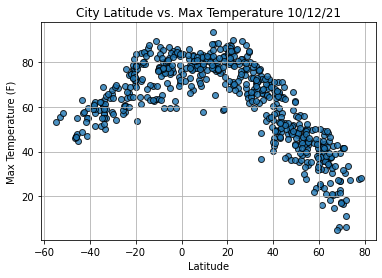

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

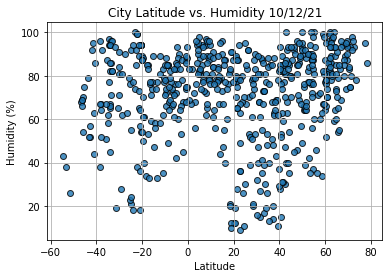

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

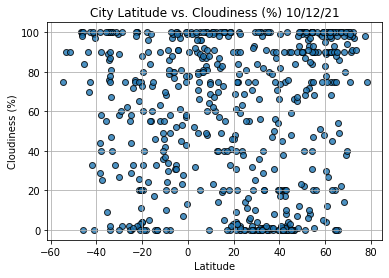

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

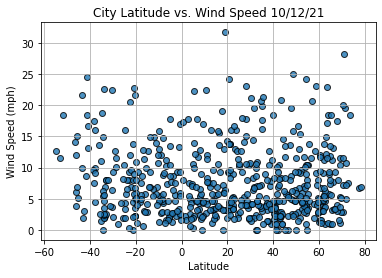

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

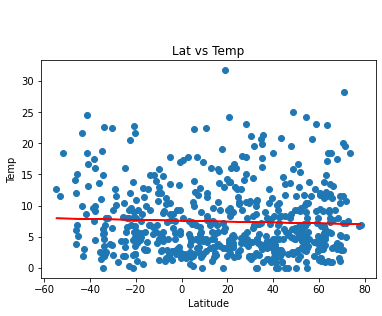

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(lats,wind_speed)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.title("Lat vs Temp")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [24]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
580,Rongcheng,CN,2021-10-12 23:36:22,30.6340,117.8517,62.58,81,100,4.23
582,Madras,IN,2021-10-12 23:36:23,13.0878,80.2785,78.78,89,40,5.75
583,Mehamn,NO,2021-10-12 23:36:23,71.0357,27.8492,41.41,75,99,28.30
585,Bubaque,GW,2021-10-12 23:36:24,11.2833,-15.8333,82.78,76,91,7.72
586,Chamba,IN,2021-10-12 23:36:25,32.5667,76.1333,62.65,41,0,8.61


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.tail()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
570,Mongagua,BR,2021-10-12 23:36:18,-24.0931,-46.6208,76.93,94,33,5.75
572,Inhambane,MZ,2021-10-12 23:36:19,-23.8650,35.3833,66.70,77,1,6.62
577,Luau,AO,2021-10-12 23:36:21,-10.7073,22.2247,69.30,35,40,4.07
581,Port Keats,AU,2021-10-12 23:36:22,-14.2500,129.5500,87.87,56,46,6.82
584,Mvuma,ZW,2021-10-12 23:36:24,-19.2792,30.5283,53.85,40,0,4.00


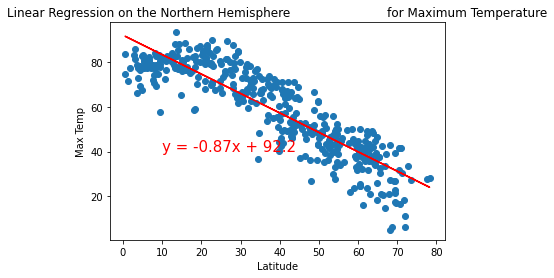

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

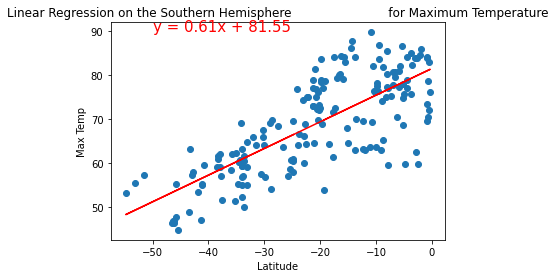

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

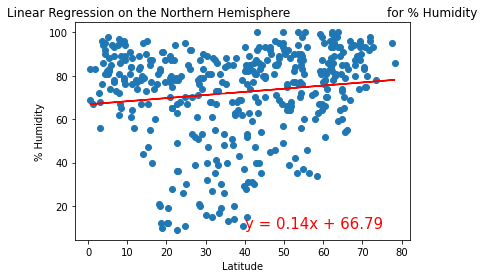

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

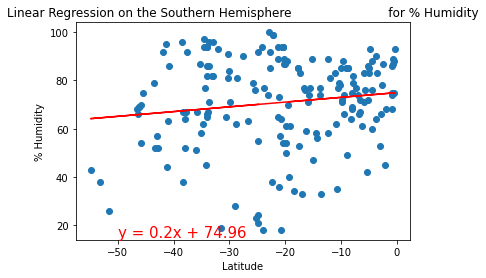

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

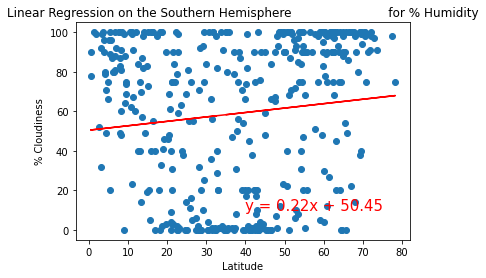

In [36]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Cloudiness',(40,10))

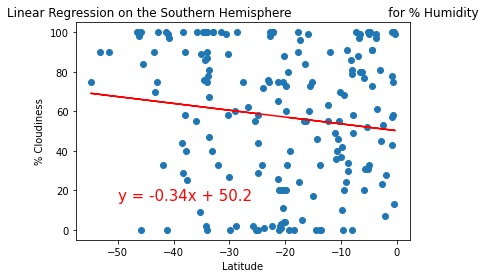

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Cloudiness',(-50,15))

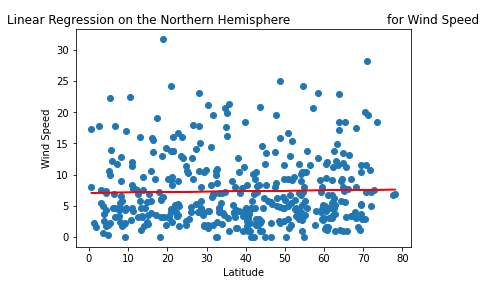

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

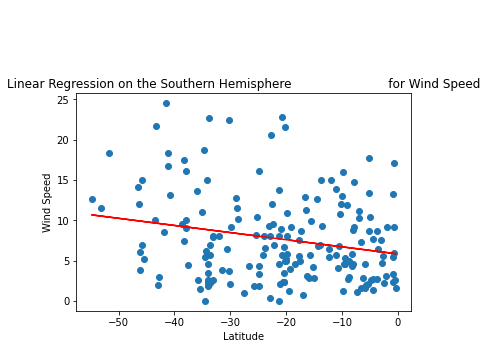

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
